## Artificial Intelligence : Project Assignment

### Heart Disease Data

Import python modules:

In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

load the dataset:

In [4]:
data=pd.read_csv('../input/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data information:

#### Data description (Attribute Information)
1. age - Age of the patient (Continuous)
2. sex - Sex of the patient (Categorical – 2 values : Male, Female)
3. cp - Chest pain type (Categorical - 4 values : types, 1:typical angina Type 2:atypical angina Type 3:non-anginal pain Type 4:asymptomatic)
4. trestbps - Resting blood pressure in mm Hg on admission to the hospital (Continuous)
5. chol - Serum cholestoral in mg/dl (Continuous)
6. fbs - Fasting blood sugar > 120 mg/dl (Categorical - 2 values : True, False)
7. restecg - Resting electrocardiographic results (Categorical - 3 values : N(Normal), L1(Level 1), L2(Level 2))
8. thalach - Maximum heart rate achieved (Continuous)
9. exang - Exercise induced angina (Categorical - 2 values : Yes, No)
10. oldpeak - ST depression induced by exercise relative to rest (Continuous)
11. slope - The slope of the peak exercise ST segment (Categorical - 3 values : Up, Flat, Down)
12. ca - Number of major vessels (0-3) colored by flourosopy (Categorical - 4 values : 0, 1, 2, 3)
13. thal - The heart status as retrieved from Thallium test (Categorical - 3 values- N (normal), FD(fixed defect), RD (reversible defect)
14. target - The predicted attribute, not used in data analysis directly (Categorical – 1 : diseased, 0 : not heart disease))

In [5]:
print(data.shape)
data.dtypes

(303, 14)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


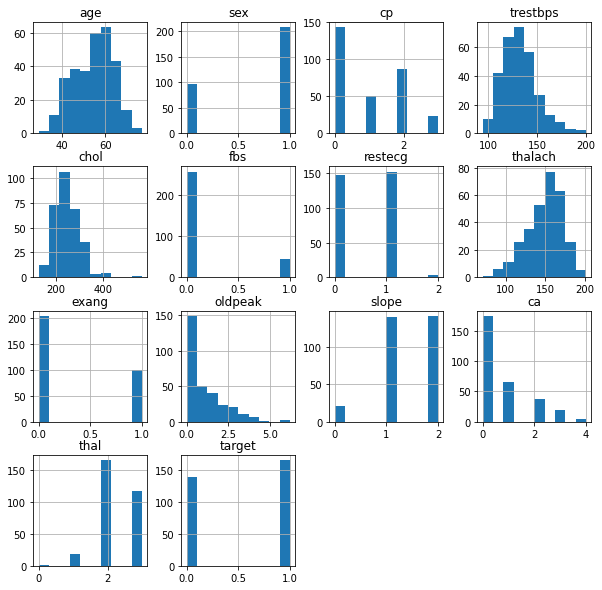

In [7]:
data.hist(figsize=(10,10))
plt.show()

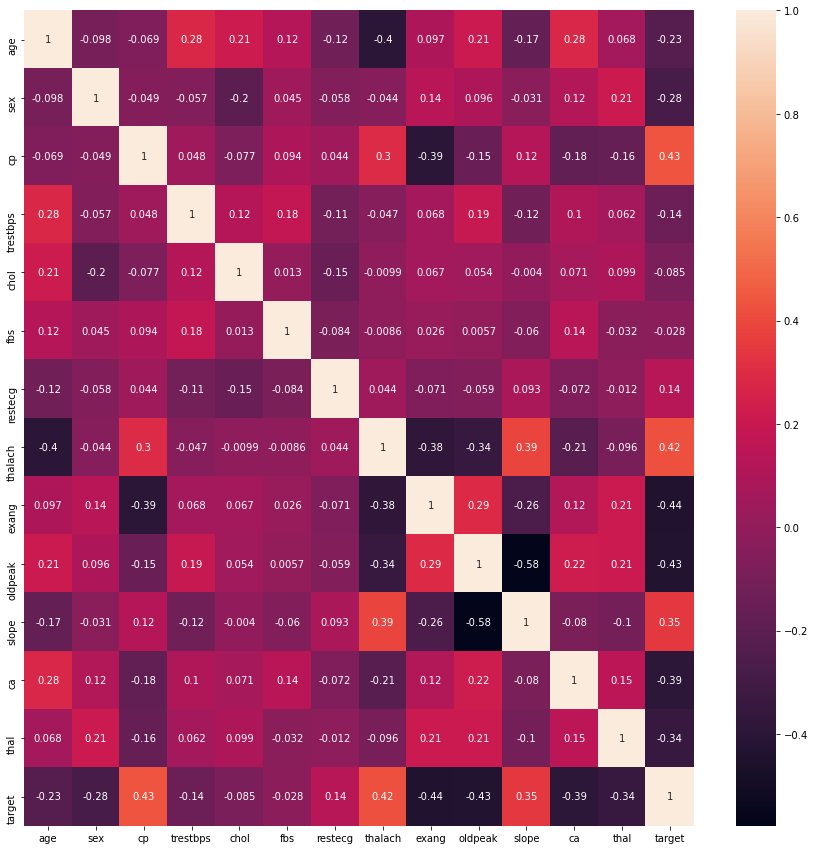

In [8]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Train, test split

In [9]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
accuracy_={}

In [11]:
y = data.target.values
x_temp = data.drop(['target'], axis=1)

In [12]:
x = (x_temp -np.min(x_temp))/(np.max(x_temp)-np.min(x_temp)).values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)

In [14]:
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',y_train.shape)

X_train shape:  (212, 13)
Y_train shape:  (212,)


### KNN (Supervised Learning)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

Training - to define best value of $k$

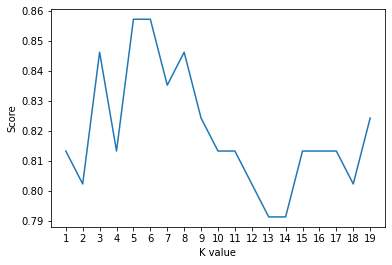

Score : 85.71%


In [18]:
score = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    score.append(np.sum(np.diag(cm))/np.sum(cm))
        
plt.plot(range(1,20), score)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.show()

acc = max(score)
accuracy_['KNN']=acc
print('Score : {:.2%}'.format(acc))

Once the model is trained, use it to predict the values for test subset:

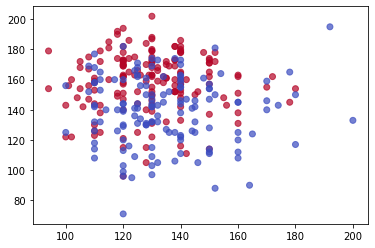

In [19]:
plt.scatter(
    x='trestbps', 
    y='thalach',
    c='target',
    cmap = 'coolwarm',
    alpha=0.7,
    data=data)

### SVM (Supervised Learning)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel = 'linear', random_state = 777)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
accuracy_['SVM']=acc
print('Score : {:.2%}'.format(acc))

Score : 89.01%


### Naive Bayes (Supervised Learning)

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
accuracy_['NB'] = acc
print('Score : {:.2%}'.format(acc))

Score : 85.71%


### Decision Tree (Supervised Learning)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
accuracy_['Decision Tree'] = acc
print('Score : {:.2%}'.format(acc))

Score : 73.63%


### Random Forest (Supervised Learning)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=777)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
accuracy_['Random Forest'] = acc
print('Score : {:.2%}'.format(acc))

Score : 89.01%


In [24]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

In [37]:
best_rf = RandomForestClassifier(bootstrap=False,
                                 max_depth=70,
                                 max_features='auto',
                                 min_samples_leaf=2,
                                 min_samples_split=5,
                                 n_estimators=600)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
scores = accuracy_score(y_test, y_pred)
accuracy_['rf_grid search'] = scores
print('Accuracy: ','{:2.2%}'.format(scores))

Accuracy:  90.11%


### Neural Network

In [31]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import adam
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical

y data (target) to categorical type

In [32]:
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

In [33]:
def neural_network():
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])
    return model

In [34]:
model = neural_network()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [35]:
import warnings
warnings.filterwarnings("ignore")

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=10)

scores = model.evaluate(X_test, Y_test)
accuracy_['Neural Network'] = scores[1]
print("accuracy: %.2f%%" % (scores[1]*100))

Train on 212 samples, validate on 91 samples
Epoch 1/10
212/212 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.4953 - val_loss: 0.6882 - val_accuracy: 0.6923
Epoch 2/10
212/212 [==============================] - 0s 159us/step - loss: 0.6870 - accuracy: 0.6698 - val_loss: 0.6806 - val_accuracy: 0.7912
Epoch 3/10
212/212 [==============================] - 0s 123us/step - loss: 0.6764 - accuracy: 0.7311 - val_loss: 0.6587 - val_accuracy: 0.8462
Epoch 4/10
212/212 [==============================] - 0s 123us/step - loss: 0.6553 - accuracy: 0.7311 - val_loss: 0.6285 - val_accuracy: 0.8681
Epoch 5/10
212/212 [==============================] - 0s 136us/step - loss: 0.6201 - accuracy: 0.7453 - val_loss: 0.5903 - val_accuracy: 0.8571
Epoch 6/10
212/212 [==============================] - 0s 112us/step - loss: 0.5877 - accuracy: 0.8066 - val_loss: 0.5453 - val_accuracy: 0.8462
Epoch 7/10
212/212 [==============================] - 0s 111us/step - loss: 0.5582 - accuracy

### Compare the models

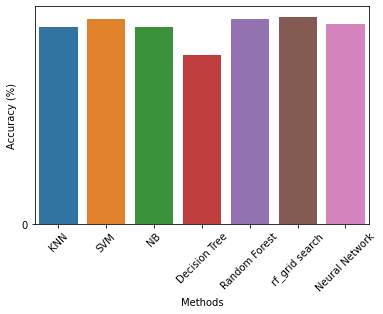

In [36]:
plt.yticks(np.arange(0, 100, 10))
plt.xticks(rotation=45)
plt.ylabel('Accuracy (%)')
plt.xlabel('Methods')
sns.barplot(x=list(accuracy_.keys()), y=list(accuracy_.values()))
plt.show()

Random forest method which apply the best parameters by grid search has the best accuracy.

Conclusion : Random Forest Grid Search > Random Forest = SVM > Neural Net > NB = KNN > Decision Tree